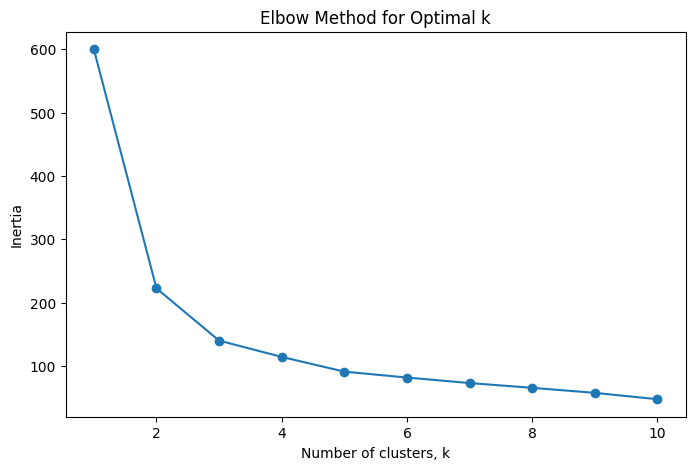

Cluster centers:
[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]

Cluster assignments:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df)

# Using the elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Implement K-Means with the optimal number of clusters (determined by the elbow method)
# Assuming the optimal k is 3 (from visual inspection)
kmeans = KMeans(n_clusters=3, random_state=0)
iris_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the cluster centers and cluster assignment
print("Cluster centers:")
print(kmeans.cluster_centers_)
print("\nCluster assignments:")
print(iris_df['Cluster'].value_counts())


Sure! Here's a detailed explanation of the code, line by line:

### 1. **Importing Necessary Libraries**

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
```

- **`pandas as pd`**: Used for data manipulation and analysis. It will allow us to handle the Iris dataset as a DataFrame.
- **`matplotlib.pyplot as plt`**: Used for plotting graphs. It helps us create the elbow plot to visualize the optimal number of clusters.
- **`KMeans`**: This is the K-Means clustering algorithm from `sklearn.cluster`. It will be used to perform the clustering.
- **`load_iris`**: This function from `sklearn.datasets` loads the Iris dataset. It returns the dataset as a dictionary-like object.
- **`StandardScaler`**: This is used for feature scaling. It standardizes the features to have a mean of 0 and a standard deviation of 1, which is important for clustering.

### 2. **Loading the Iris Dataset**

```python
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
```

- **`iris = load_iris()`**: Loads the Iris dataset, which contains data about 150 Iris flowers across 4 features: sepal length, sepal width, petal length, and petal width.
- **`iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)`**: Converts the Iris dataset into a pandas DataFrame. The `iris.data` contains the actual feature values, and `iris.feature_names` provides the names of the features as column labels.

### 3. **Standardizing the Data**

```python
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_df)
```

- **`scaler = StandardScaler()`**: Initializes the StandardScaler object that will standardize the dataset.
- **`scaled_data = scaler.fit_transform(iris_df)`**: Standardizes the features in `iris_df`. It scales the data so that each feature will have a mean of 0 and a standard deviation of 1, which is important for distance-based algorithms like K-Means.

### 4. **Using the Elbow Method to Determine the Optimal Number of Clusters**

```python
inertia = []
K = range(1, 11)
```

- **`inertia = []`**: Initializes an empty list to store the inertia (sum of squared distances to the nearest cluster center) for different values of \(k\).
- **`K = range(1, 11)`**: Defines a range of \(k\) values (from 1 to 10) to try when performing K-Means clustering.

```python
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
```

- **`for k in K:`**: Loops through each value of \(k\) from 1 to 10.
  - **`kmeans = KMeans(n_clusters=k, random_state=0)`**: Initializes the KMeans object with the current number of clusters \(k\).
  - **`kmeans.fit(scaled_data)`**: Fits the K-Means model to the standardized data. The algorithm finds the best cluster centers for the given number of clusters.
  - **`inertia.append(kmeans.inertia_)`**: Appends the inertia value (which is a measure of how well the clusters fit) for the current \(k\) to the `inertia` list.

### 5. **Plotting the Elbow Curve**

```python
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
```

- **`plt.figure(figsize=(8, 5))`**: Creates a new figure for the plot with the specified size (8 inches wide and 5 inches tall).
- **`plt.plot(K, inertia, marker='o')`**: Plots the inertia values against the number of clusters \(k\). The `marker='o'` argument adds circular markers at each data point.
- **`plt.xlabel('Number of clusters, k')`**: Adds a label to the x-axis to indicate that it represents the number of clusters \(k\).
- **`plt.ylabel('Inertia')`**: Adds a label to the y-axis to indicate that it represents the inertia (a measure of how compact the clusters are).
- **`plt.title('Elbow Method for Optimal k')`**: Adds a title to the plot explaining that this is the elbow method for determining the optimal \(k\).
- **`plt.show()`**: Displays the plot.

### 6. **Performing K-Means Clustering with the Optimal Number of Clusters**

```python
kmeans = KMeans(n_clusters=3, random_state=0)
iris_df['Cluster'] = kmeans.fit_predict(scaled_data)
```

- **`kmeans = KMeans(n_clusters=3, random_state=0)`**: Initializes the KMeans object with \(k=3\) clusters, which is the optimal number of clusters determined from the elbow plot (usually around where the "elbow" occurs in the graph).
- **`iris_df['Cluster'] = kmeans.fit_predict(scaled_data)`**: Performs the K-Means clustering and assigns the cluster labels to the new column 'Cluster' in the DataFrame. The `fit_predict()` method fits the model to the data and assigns each sample to one of the clusters.

### 7. **Displaying Cluster Centers and Assignments**

```python
print("Cluster centers:")
print(kmeans.cluster_centers_)
print("\nCluster assignments:")
print(iris_df['Cluster'].value_counts())
```

- **`print("Cluster centers:")`**: Prints a message indicating that the next output will show the coordinates of the cluster centers.
- **`print(kmeans.cluster_centers_)`**: Prints the coordinates of the \(k\) cluster centers. These are the centroid positions of each cluster in the feature space.
- **`print("\nCluster assignments:")`**: Prints a message indicating that the next output will show the number of data points assigned to each cluster.
- **`print(iris_df['Cluster'].value_counts())`**: Prints the number of data points assigned to each cluster (i.e., the size of each cluster).

### Summary of the Steps:
1. The Iris dataset is loaded and standardized.
2. The elbow method is used to find the optimal number of clusters by analyzing inertia values.
3. K-Means clustering is performed with the optimal number of clusters (3 in this case).
4. The results, including the cluster centers and the number of data points per cluster, are printed.

The elbow method helps determine the best \(k\), and the K-Means algorithm assigns data points to the clusters based on this optimal value.